# *Project 2: Bose Einstein Condensate in Harmonic Trap*

---


*Subject: Statistical Mechanics(SPHY801)*

*Class: M.Sc. Part I* 

*Authors: Kunal Singh, Tanishka Manjrekar*

Importing Necessary Libraries:

In [ ]:
import numpy as np
from numpy import linalg as LA
import scipy.integrate
import matplotlib.pyplot as plt
import pandas as pd
np.set_printoptions(precision=3)

Setting up constants:

In [ ]:
m=1                                                                  #mass of the particle
wx=0.02                                                              #frequency of the oscillator
h=1                                                                  #keeping plank's constant as unity
hbar=h/(2*np.pi)    
ax=np.sqrt(1/wx)                                                     #linear size of the unperturbed harmonic oscillator ground state in x direction

Defining Normalization Function:

In [ ]:
#Normalization function
def normalize_psi(psi, x):
    int_psi_square = scipy.integrate.simps(abs(psi) ** 2, x)
    return abs(psi/np.sqrt(int_psi_square))

Defining Crank Nicolson Function:

In [ ]:
def CN(J,N,asc):                                                     #J=No. of bosons, N=No. of time steps, asc= scattering length  

  #Calculating dependent PARAMETERS

  dt = 1                                                             #interval between two temporal grid points

  t_grid = np.array([n*dt for n in range(-int(N/2),int(N/2))])       #temporal grid

  g=4*np.pi*asc*hbar**2/m                                            #Interaction term 
  dx = h                                                             #distance between two spatial grid points
  x_grid = np.array([j*dx for j in range(-int(J/2),int(J/2))])       #spatial grid


   
  psi0=1/((np.pi**1/4)*np.sqrt(ax))*np.exp(-1/2*(x_grid**2/ax**2))   #Initial ground state wavefunction
  psi=psi0
  V=1/2*(m*wx*x_grid*x_grid)                                         #Potential of the Harmonic Trap    


  #Defining Matrix Elements
  beta=[]

  for i in range(J):
                                                                     #Beta:Diagonal element
    beta1=1/2+complex(0,dt*hbar/(4*m*h**2))+\
    complex(0,dt*V[i])/(4*hbar)+\
    complex(0,dt*g*np.abs(psi[i])**2)/(4*hbar)
    beta.append(beta1)     

    gamma=alpha=complex(0,-dt*hbar/(8*m*h**2))                       #Gammma,Alpha:Off-Diagonal elements


  #CONSTRUCTING THE MATRIX
  Q=np.diagflat([gamma for i in range(J-1)],-1)+\
  np.diagflat([beta[i] for i in range(J)])+\
  np.diagflat([alpha for i in range(J-1)],1)
  Q[0][J-1]=alpha  
  Q[J-1][0]=gamma


  #Inverse of Q
  Q_inv=np.linalg.inv(Q)

  #Iterating over the entire grid
  psi_time=[]
  psi_timen=[]
  for i in range(0,N):

    aux=np.dot(Q_inv,psi)                                            #Auxiliary Function
    psi=aux-psi                                                     
    psi=psi*np.exp(complex(0,-dt)) 
    psi_time.append(psi)                                             #Solution
    psinor=normalize_psi(psi,x_grid)
    psi_timen.append(psinor)                                         #Normalized Solution   
  
  #Building the hamiltonian
  beta_arr=[]

  for i in range(J):
    beta12=hbar/(m*h**2)+V[i]+dt*g*np.abs(psi[i])**2
    beta_arr.append(beta12)
  gamma1=alpha1=-hbar/(2*m*h**2)

  H=np.diagflat([gamma1 for i in range(J-1)],-1)+\
  np.diagflat([beta_arr[i] for i in range(J)])+\
  np.diagflat([alpha1 for i in range(J-1)],1)

  
  #Calculating Energy Eigenvalues from Hamiltonian
  E,E_vec=LA.eig(H)                                                      #|E|

  return psi0,psi_timen,E,x_grid,t_grid                     

Energy Values:


Plotting ground-state wavefunction ψ:

(-25.0, 25.0)

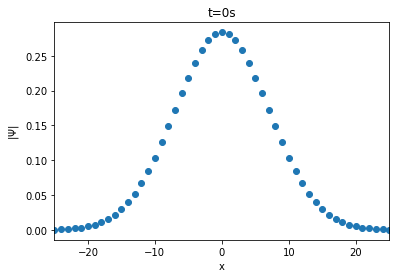

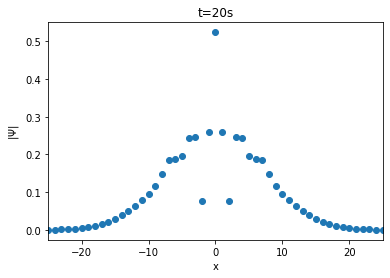

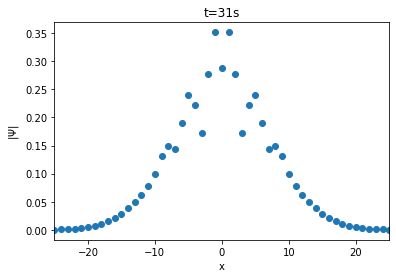

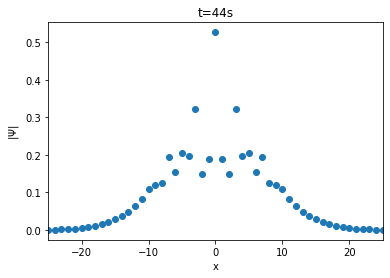

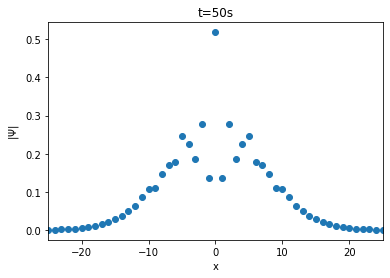

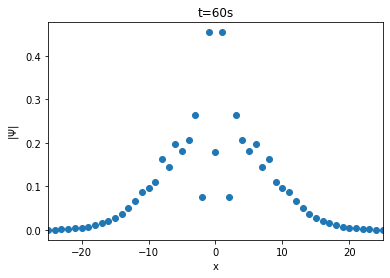

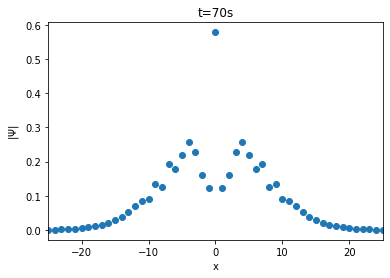

In [ ]:
psitime,p,E,x,t=CN(100,100,0.005)                                   #Calling the function


#Scatter plots
plt.scatter(x,p[0])                                                  #At t=0s                                                            
plt.title('t=0s')
plt.ylabel('$|\Psi|$')
plt.xlabel('x')
plt.xlim(-25,25)
plt.figure()

plt.scatter(x,p[20])                                                 #At t=20s
plt.title('t=20s')
plt.ylabel('$|\Psi|$')
plt.xlabel('x')
plt.xlim(-25,25)
plt.figure()

plt.scatter(x,(p[31]))                                               #At t=31s
plt.ylabel('$|\Psi|$')
plt.xlabel('x')
plt.title('t=31s')
plt.xlim(-25,25)
plt.figure()

plt.scatter(x,p[44])                                                 #At t=31s
plt.ylabel('$|\Psi|$') 
plt.xlabel('x')
plt.title('t=44s')
plt.xlim(-25,25)

plt.figure()
plt.scatter(x,p[50])                                                 #At t=31s
plt.ylabel('$|\Psi|$') 
plt.xlabel('x')
plt.title('t=50s')
plt.xlim(-25,25)

plt.figure()
plt.scatter(x,p[60])                                                 #At t=31s
plt.ylabel('$|\Psi|$') 
plt.xlabel('x')
plt.title('t=60s')
plt.xlim(-25,25)

plt.figure()
plt.scatter(x,p[70])                                                 #At t=31s
plt.ylabel('$|\Psi|$') 
plt.xlabel('x')
plt.title('t=70s')
plt.xlim(-25,25)

In [ ]:
psinit,psitimen,E,x,t=CN(100,100,-0.511)        
E

array([25.166, 24.169, 23.199, 22.249, 21.319, 20.409, 15.369, 16.159,
       14.599, 16.969, 17.799, 18.649, 19.519, 13.849, 13.119, 12.409,
       11.719, 11.049, 10.399,  9.769,  9.16 ,  8.57 ,  8.   ,  7.45 ,
        6.92 ,  6.41 ,  5.92 ,  5.45 ,  5.   ,  4.57 ,  4.16 ,  3.77 ,
        3.4  ,  3.05 ,  2.72 ,  2.41 ,  2.12 ,  1.85 ,  1.599, -0.067,
        1.369,  0.067,  0.088,  0.157,  0.183,  0.253,  1.157,  0.266,
        0.317,  0.32 ,  0.402,  0.402,  1.599,  0.511,  0.511,  0.641,
        0.641,  0.795,  0.795,  0.967,  0.967,  1.157,  1.369,  1.85 ,
        2.12 ,  2.41 ,  4.57 ,  2.72 ,  3.05 ,  3.4  ,  3.77 ,  4.16 ,
        5.   ,  5.45 ,  5.92 ,  6.41 ,  6.92 ,  7.45 , 11.049,  8.   ,
        8.57 ,  9.16 ,  9.769, 10.399, 11.719, 12.409, 13.119, 13.849,
       14.599, 15.369, 16.159, 16.969, 17.799, 23.199, 18.649, 19.519,
       20.409, 21.319, 22.249, 24.176])